<p style ="text-align:center">
    <img src="http://epecora.com.br/DataFiles/PPGOLD_logo.png" width="300" alt="PPGOLD Data Science: INTRO"  />
</p>

# Aula 02-3 de Data Science

# Regressão Com Dummies
Tempo estimado: **30** minutos

## Objetivos

Após completar esta aula, você será capaz de:

* Criar modelos de regressão linear com variáveis dicotômicas e policotômicas
* Calcular o erro R^2
* Calcular o MAD,MSE e MSRE

## Bibliotecas

In [2]:
# importando a biblioteca pandas para manipulação de dados
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelBinarizer

# importando as bibliotecas do matplotlib para gerar gráficos
import matplotlib as mpl
import matplotlib.pyplot as plt
# Importando a biblioteca math que fornece funções matemáticas básicas
import math 
# Importando biblioteca do seaborn para gerar gráficos mais atraentes e informativos
import seaborn as sns

# Importando a classe LinearRegression do sklearn 
# Essa classe implementa uma versão da regressão linear simples ou múltipla
# Usado para modelar a relação entre uma variável dependente contínua e uma ou mais variáveis independentes.
from sklearn.linear_model import LinearRegression

# Usado para exibir os gráficos gerados pela biblioteca Matplotlib diretamente no notebook, sem precisar abrir uma janela externa.
%matplotlib inline


## Obtendo dados

In [3]:
caminho = "" 

# Caminho do arquivo csv
caminho = "https://raw.githubusercontent.com/EduPekUfpr/PPGOLD7037/main/Data/MeuAutoLimpo.csv" 

#Obtendo arquivo e passando-o para um dataframe
df = pd.read_csv(caminho) 

In [4]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,164,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


## Regressão Linear Com Dummies

### Variáveis Dicotômicas 

In [5]:
df_dummy_dicotomica = df[['price','horsepower', 'highway-mpg','num-of-doors']].copy(deep=True)

df_dummy_dicotomica = df_dummy_dicotomica.rename(columns={'highway-mpg': 'highway_mpg','num-of-doors':'num_of_doors'})

df_dummy_dicotomica.head()

,price,horsepower,highway_mpg,num_of_doors
0,13495.0,111.0,27,two
1,16500.0,111.0,27,two
2,16500.0,154.0,26,two
3,13950.0,102.0,30,four
4,17450.0,115.0,22,four


In [6]:
label_binarizer = LabelBinarizer()
dicotomica = df_dummy_dicotomica['num_of_doors']
label_binarizer.fit(dicotomica)
df_dummy_dicotomica['num_of_doors'] = label_binarizer.transform(dicotomica)

In [7]:
df_dummy_dicotomica.head(10)

,price,horsepower,highway_mpg,num_of_doors
0,13495.0,111.0,27,1
1,16500.0,111.0,27,1
2,16500.0,154.0,26,1
3,13950.0,102.0,30,0
4,17450.0,115.0,22,0
5,15250.0,110.0,25,1
6,17710.0,110.0,25,0
7,18920.0,110.0,25,0
8,23875.0,140.0,20,0
9,16430.0,101.0,29,1


In [8]:
lm = LinearRegression()
lm

LinearRegression()

In [9]:
X = df_dummy_dicotomica[['horsepower', 'highway_mpg','num_of_doors']]
Y = df_dummy_dicotomica['price']

# Carregando o modelo
lm.fit(X, Y)

# Predizendo os valores
df_dummy_dicotomica.loc[:,'YHat'] = lm.predict(X)

# Exibindo o R^2
R2=lm.score(X,Y)

print("SCORE: %.4f" % R2)


SCORE: 0.6756


Text(45000, 3.3e-05, 'SCORE: 0.675610')

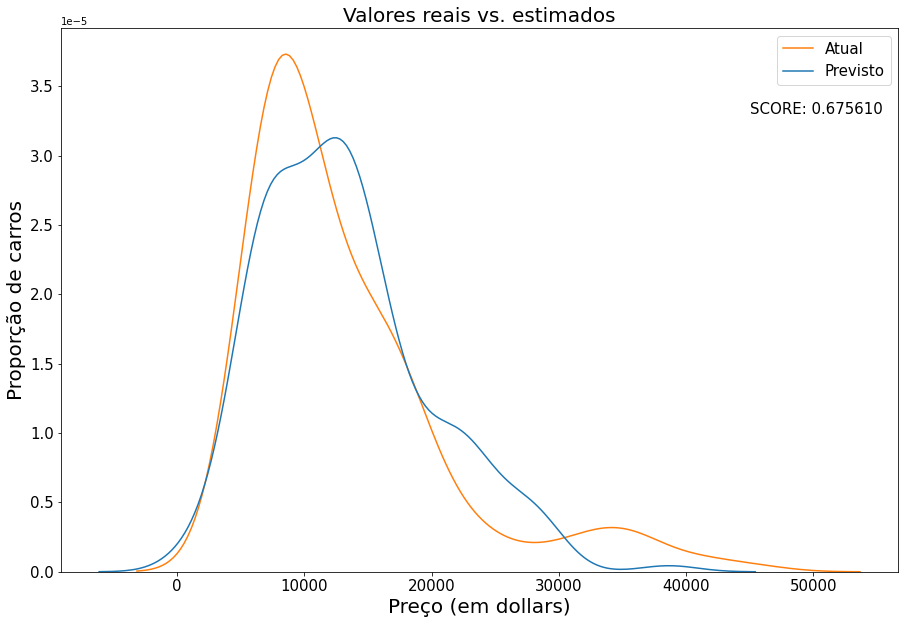

In [10]:
plt.figure(figsize=(15, 10))

sns.kdeplot(data = df_dummy_dicotomica[['YHat','price']])

plt.title('Valores reais vs. estimados', size = 20)
plt.xlabel('Preço (em dollars)', size = 20)
plt.ylabel('Proporção de carros', size = 20)
plt.yticks(size = 15)
plt.xticks(size = 15) 
plt.legend(labels=["Atual","Previsto"], fontsize = 15, bbox_to_anchor=(1, 1))

tt = "SCORE: %4f" % R2

plt.text(45000, 0.000033, tt, size = 15)

Text(0.5, 0, 'Resíduo (em dollars)')

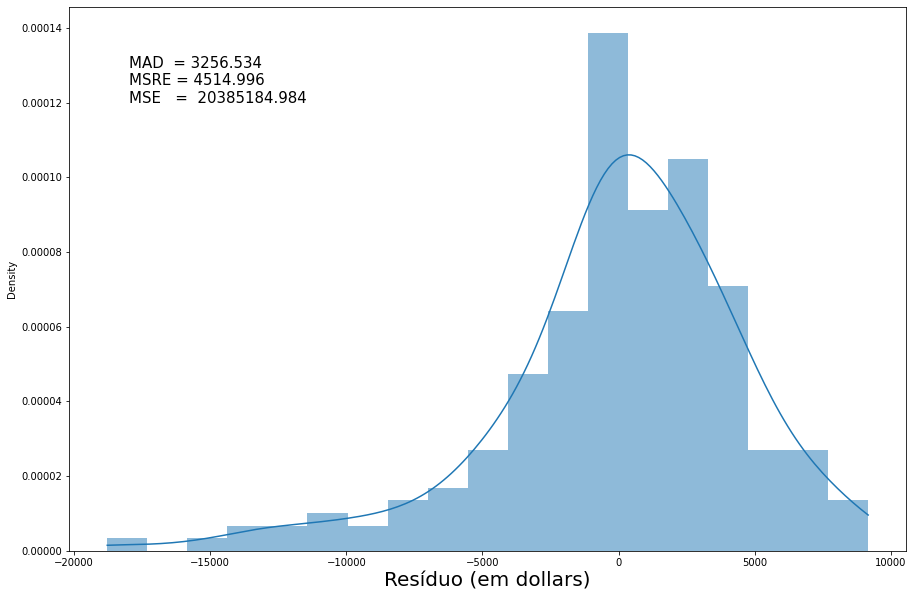

In [11]:
# Erro
df_dummy_dicotomica.loc[:,'Deviation'] = df_dummy_dicotomica['YHat']-df_dummy_dicotomica['price']

# Erro absoluto
df_dummy_dicotomica.loc[:,'AbsDeviation'] = abs(df_dummy_dicotomica['YHat']-df_dummy_dicotomica['price'])

# Quadrado do erro absolulto
df_dummy_dicotomica.loc[:,'SquaredError'] = (df_dummy_dicotomica['price']-df_dummy_dicotomica['YHat'])**2

#Mean Absolute Desviation - Erro absoluto médio
MAD = df_dummy_dicotomica['AbsDeviation'].mean()

#Mean Squared Error - Erro quadrado médio
MSE = df_dummy_dicotomica['SquaredError'].mean()

#Mean Squared Root Error = Raiz do erro quadrado médio
MSRE = math.sqrt(MSE)

plt.figure(figsize=(15, 10))

tt = "MAD  = %.3f \nMSRE = %.3f \nMSE   =  %.3f" % (MAD, MSRE, MSE)

sns.histplot(x=df_dummy_dicotomica['Deviation'], kde=True, stat="density", linewidth=0)
plt.text(-18000, 0.00012, tt, size=15, color = "black")
plt.xlabel('Resíduo (em dollars)', size = 20)

### Variáveis Policotômicas (n - 1 dummies)

In [12]:
lm = LinearRegression()
lm

LinearRegression()

In [13]:
df_dummy_policotomica = df[['price','horsepower', 'highway-mpg','make']].copy(deep=True)

df_dummy_policotomica.head()

,price,horsepower,highway-mpg,make
0,13495.0,111.0,27,alfa-romero
1,16500.0,111.0,27,alfa-romero
2,16500.0,154.0,26,alfa-romero
3,13950.0,102.0,30,audi
4,17450.0,115.0,22,audi


In [14]:
df_categorias_make = pd.DataFrame({'cat': df_dummy_policotomica['make'].unique()})
df_categorias_make

,cat
0,alfa-romero
1,audi
2,bmw
3,BMW
4,chevrolet
5,dodge
6,doge
7,honda
8,isuzu
9,jaguar


In [15]:
df_dummy_policotomica['make'] = df_dummy_policotomica['make'].apply(lambda x: 'bmw' if x == 'BMW' else x)

In [16]:
df_categorias_make = pd.DataFrame({'cat': df_dummy_policotomica['make'].unique()})
df_categorias_make

,cat
0,alfa-romero
1,audi
2,bmw
3,chevrolet
4,dodge
5,doge
6,honda
7,isuzu
8,jaguar
9,mazda


In [17]:
df_dummy_policotomica['make'] = df_dummy_policotomica['make'].apply(lambda x: 'dodge' if x == 'doge' else x)
df_dummy_policotomica['make'] = df_dummy_policotomica['make'].apply(lambda x: 'volkswagen' if x == 'VW' else x)
df_dummy_policotomica['make'] = df_dummy_policotomica['make'].apply(lambda x: 'volvo' if x == 'volv1' else x)

df_categorias_make = pd.DataFrame({'cat': df_dummy_policotomica['make'].unique()})
df_categorias_make

,cat
0,alfa-romero
1,audi
2,bmw
3,chevrolet
4,dodge
5,honda
6,isuzu
7,jaguar
8,mazda
9,mercedes-benz


In [18]:
# Crie uma instância do codificador OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Ajuste e transforme os dados da coluna "make"
dummy_array = encoder.fit_transform(df_dummy_policotomica[['make']])

# Crie um DataFrame Pandas com as variáveis dummy
dummy_df = pd.DataFrame(dummy_array, columns=encoder.get_feature_names_out(['make']))

# Concatene o DataFrame dummy com os outros dados
df_dummy_policotomica = pd.concat([df_dummy_policotomica.drop('make', axis=1), dummy_df], axis=1)




C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [19]:
primeira_categoria = encoder.get_feature_names_out(['make'])[0]
primeira_categoria

'make_alfa-romero'

In [20]:
# Exclua a primeira coluna dummy criada
df_dummy_policotomica = df_dummy_policotomica.drop(labels=primeira_categoria, axis=1)

In [21]:
df_dummy_policotomica.head()

,price,horsepower,highway-mpg,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,...,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo
0,13495.0,111.0,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,16500.0,111.0,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,16500.0,154.0,26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,13950.0,102.0,30,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17450.0,115.0,22,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
X = df_dummy_policotomica[df_dummy_policotomica.drop(labels='price',axis='columns').columns]
Y = df_dummy_policotomica['price']

# Carregando o modelo
lm.fit(X, Y)

# Predizendo os valores
df_dummy_policotomica.loc[:,'YHat'] = lm.predict(X)

# Exibindo o R^2
R2=lm.score(X,Y)

print("SCORE: %.4f" % R2)

SCORE: 0.9173


Text(45000, 3.3e-05, 'SCORE: 0.917254')

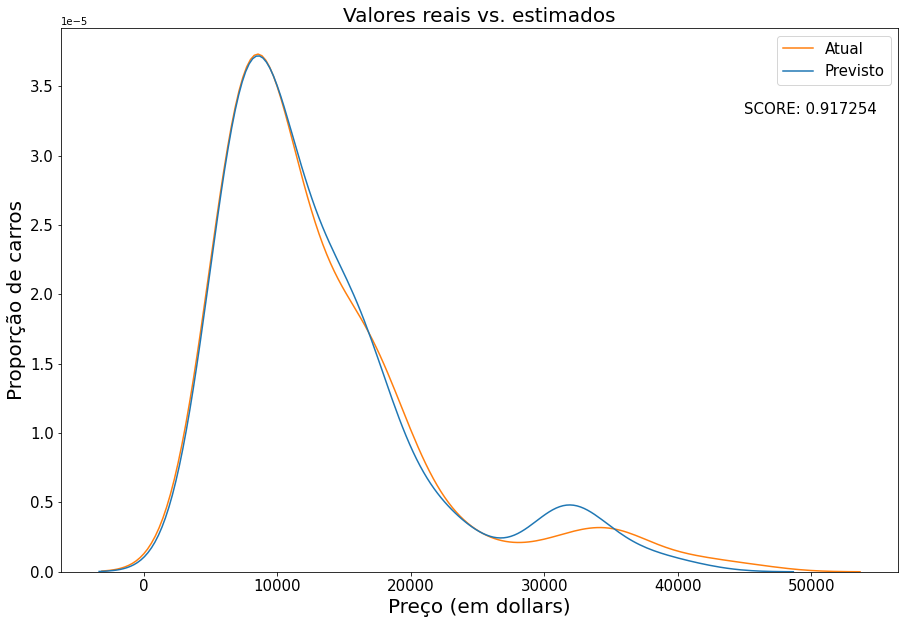

In [23]:
plt.figure(figsize=(15, 10))

sns.kdeplot(data = df_dummy_policotomica[['YHat','price']])

plt.title('Valores reais vs. estimados', size = 20)
plt.xlabel('Preço (em dollars)', size = 20)
plt.ylabel('Proporção de carros', size = 20)
plt.yticks(size = 15)
plt.xticks(size = 15) 
plt.legend(labels=["Atual","Previsto"], fontsize = 15, bbox_to_anchor=(1, 1))

tt = "SCORE: %4f" % R2

plt.text(45000, 0.000033, tt, size = 15)

Text(0.5, 0, 'Resíduo (em dollars)')

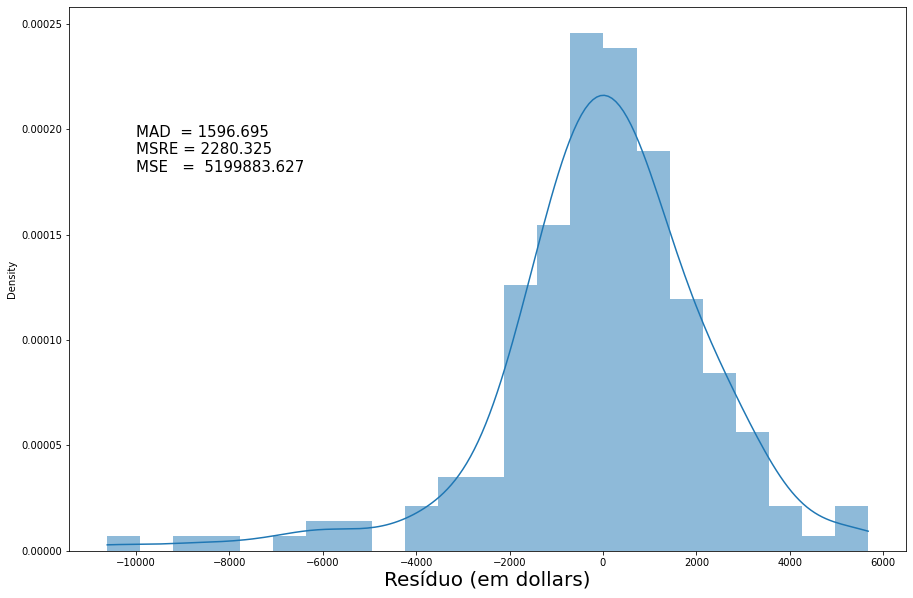

In [24]:
# Erro
df_dummy_policotomica.loc[:,'Deviation'] = df_dummy_policotomica['YHat']-df_dummy_policotomica['price']

# Erro absoluto
df_dummy_policotomica.loc[:,'AbsDeviation'] = abs(df_dummy_policotomica['YHat']-df_dummy_policotomica['price'])

# Quadrado do erro absolulto
df_dummy_policotomica.loc[:,'SquaredError'] = (df_dummy_policotomica['price']-df_dummy_policotomica['YHat'])**2

#Mean Absolute Desviation - Erro absoluto médio
MAD = df_dummy_policotomica['AbsDeviation'].mean()

#Mean Squared Error - Erro quadrado médio
MSE = df_dummy_policotomica['SquaredError'].mean()

#Mean Squared Root Error = Raiz do erro quadrado médio
MSRE = math.sqrt(MSE)

plt.figure(figsize=(15, 10))

tt = "MAD  = %.3f \nMSRE = %.3f \nMSE   =  %.3f" % (MAD, MSRE, MSE)

sns.histplot(x=df_dummy_policotomica['Deviation'], kde=True, stat="density", linewidth=0)
plt.text(-10000, 0.00018, tt, size=15, color = "black")
plt.xlabel('Resíduo (em dollars)', size = 20)

## Referências:

Translated and inspired in the material developed by IBM:
<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01" target="_blank">Joseph Santarcangelo</a>
<br>

Documentação da biblioteca <a href="https://pandas.pydata.org/docs/">Pandas</a>

Documentação da biblioteca <a href="https://seaborn.pydata.org/">Seaborn</a>

Documentação do biblioteca <a href="https://matplotlib.org/">Matplotlib</a>

Documentação do biblioteca <a href="https://numpy.org/devdocs/reference/index.html">Numpy</a>

## Autores

<a href="https://www.linkedin.com/in/eduardopecora/" target="_blank">Eduardo Pecora</a>

<a href="https://www.linkedin.com/in/hesauhugocavalcanti/" target="_blank">Hesau Hugo</a>

## Log de modificações

| Data | Versão | Modificado por | Descrição |
| -----------| ------- | ---------- | ---------------------------------- |
| 04-04-2021       | 1.0     | Eduardo Pecora    | Inicial               |
| 03-11-2021       | 1.1     | Eduardo Pecora    | Estrutura Aula        |
| 08-03-2022       | 1.2     | Eduardo Pecora    | GitHub                |
| 17-04-2023       | 1.3     | Hesau Hugo        | Reestruturação        |